___

# Machine Learning in Geosciences ] 
Department of Applied Geoinformatics and Carthography, Charles University

Lukas Brodsky lukas.brodsky@natur.cuni.cz


# Benchmark of Fundamental ML Algorithms with Scikit-learn

This benchmark outlines the implementation, evaluation, and comparison of fundamental machine learning algorithms using the Scikit-learn library in Python. The selected algorithms include:

* k-Nearest Neighbors (KNN)

* Decision Trees

* Support Vector Machines (SVM)

* Artificial Neural Networks (ANN) with Gradient Descent


The evaluation criteria focus on the algorithms' advantages, disadvantages, and computational complexity.

## Task: 
Prove or disprove the advantages or disadvantages of the fundamaental algorithms and their computational demand (processing time) using simulated synthetic data sets. 


**The algortihms overview**

### k-Nearest Neighbors (KNN)

`sklearn.neighbors.KNeighborsClassifier`

Advantages:
* No training phase (lazy learning)
* Effective for small datasets

Disadvantages:
* Computationally expensive during inference for large datasets
* Sensitive to irrelevant features and noisy data
* Requires distance metric tuning

### Decision Trees

`sklearn.tree.DecisionTreeClassifier`

Advantages:
* Easy to interpret and visualize
* Requires little data preprocessing

Disadvantages:
* Prone to overfitting
* Sensitive to noisy data
* Greedy splitting may lead to suboptimal trees

### Support Vector Machines (SVM)

`sklearn.svm.SVC`

Advantages:
* Effective in high-dimensional spaces
* Robust to overfitting (with appropriate kernel and regularization)
* Can model non-linear decision boundaries (with kernels)

Disadvantages:
* Computationally expensive for large datasets
* Sensitive to hyperparameters

### Artificial Neural Networks (ANN)

`sklearn.neural_network.MLPClassifier`

Advantages:
* Capable of learning complex patterns
* Works well with large datasets
* Can approximate any continuous function (universal approximation theorem)

Disadvantages:
* Requires large datasets and tuning of hyperparameters
* Computationally expensive
* Black-box nature makes interpretation difficult


This benchmark will continue in the next lesson with model hyperparameters fintuning in order to generalize well the algorithms in each task. 

This benchmark provides a comparative summary of fundamental machine learning algorithms available in Scikit-learn. The selection of an algorithm should be guided by the dataset size, feature dimensionality, noise level, and the complexity of the underlying patterns. While some algorithms like KNN and Decision Trees are suitable for small datasets with interpretable outputs, others like ANN and SVM excel in complex pattern recognition at the cost of higher computational requirements.

Further performance evaluation should be conducted on domain-specific datasets to provide more detailed insights into model selection and hyperparameter tuning.

In [197]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_friedman1
from sklearn.datasets import make_circles

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pandas as pd
# from sklearn.cluster import KMeans, DBSCAN

### Generate synthetic data

In [198]:
# Generate synthetic datasets with increasing complexity
# MAKE_CLASSIFICATION
def generate_data1(samples, complexity):
    return make_friedman1(n_samples=samples, n_features=complexity, noise=0.1, random_state=42)

In [199]:
# Generate synthetic datasets with increasing complexity
# MAKE_MOONS
def generate_data2(samples=1000, noise=0.1):
    return make_moons(n_samples=samples, shuffle=True, noise=noise, random_state=42)


In [200]:
# Generate synthetic datasets with increasing complexity
# MAKE_CIRCLES
def generate_data3(samples=1000, noise=0.1):
    return make_circles(n_samples=samples, shuffle=True, noise=noise, random_state=42, factor=0.8)

### Models evaluation

#### KNN 
* `n_neighbors` int, default=5 

#### Decition Tree Classifier 
* `max_depth` int, default=None
* `min_samples_split` int or float, default=2
* `min_samples_leaf` int or float, default=1
* `random_state` 

#### SVC
* `C` float, default=1.0 (Regularization parameter. The strength of the regularization is inversely proportional to C.)
* `kernel` {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
* `gamma`{‘scale’, ‘auto’} or float, default=’scale’ Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

#### MLPClassifier
* `hidden_layer_sizes` array-like of shape(n_layers - 2,), default=(100,) The ith element represents the number of neurons in the ith hidden layer.
* `activation`{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
* `solver` {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
* `batch_size` int, default=’auto’ Size of minibatches for stochastic optimizers. If the solver is ‘lbfgs’, the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples).
* `learning_rate` {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’ Learning rate schedule for weight updates.
* `learning_rate_init` float, default=0.001 The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
* `max_iter` int, default=200 Maximum number of iterations.
* `random_stat` 


In [201]:
df_results = pd.DataFrame(columns=['DatasetType', 'Algorithm', 'Complexity', 'Accuracy', 'Time'])

In [202]:
knn_model = KNeighborsClassifier(n_neighbors=5)
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
svc_model = SVC(kernel='rbf')
ann_model = MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000)

In [203]:
# Data - change to other data generators 
complexity = 0.1 # 0.4, 0.6, 0.8, 1.0 
X, y = generate_data2(samples=1000, noise=complexity)

In [204]:
# Split to training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [205]:
# select model and fit (change the model parameters manually) 
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
ann_model.fit(X_train, y_train)



MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000)

In [206]:
# make predictions on X_test
y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_svc = svc_model.predict(X_test)
y_pred_ann = ann_model.predict(X_test)


In [207]:
# evaluate test accuracy and print it 
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_ann = accuracy_score(y_test, y_pred_ann)


In [208]:
print(f'KNN accuracy: {accuracy_knn:.2f}')
print(f'DT accuracy: {accuracy_dt:.2f}')
print(f'SVC accuracy: {accuracy_svc:.2f}')
print(f'ANN accuracy: {accuracy_ann:.2f}')

list_accuracies = [accuracy_knn, accuracy_dt, accuracy_svc, accuracy_ann]
list_models = ['knn_model', 'dt_model', 'svc_model', 'ann_model']
max_accuracy = max(list)

max_index = list.index(max_accuracy)
best_model = list_models[max_index]
print('The best model is ', best_model)

KNN accuracy: 1.00
DT accuracy: 1.00
SVC accuracy: 1.00
ANN accuracy: 1.00
The best model is  svc_model


## Systematic ML algorithms benchmark

In [209]:
# Measure time 
start_time = time.time()
print('Running process X/Y')
elapsed_time = time.time() - start_time
print(elapsed_time)

Running process X/Y
0.0


In [210]:
# Define models to benchmark
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'SVM': SVC(kernel='rbf'),
    'ANN': MLPClassifier(hidden_layer_sizes=(64,), max_iter=1000) #,
}

In [211]:
# Loop over model complexity and models and store the results
results = []
samples_number = 5000

# Experiment Loop
for complexity in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,  0.8, 0.9, 1.0]:
    X1, y1 = generate_data2(samples=samples_number*3, noise=complexity)
    # X1, y1 = make_friedman1(n_samples=samples_number, n_features=5, noise=complexity, random_state=42)
    X2, y2 = generate_data2(samples=samples_number, noise=complexity)
    X3, y3 = generate_data3(samples=samples_number, noise=complexity)
    # train / test split 
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
    X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

    for model_name, model in models.items():
        start_time = time.time()
        print(f'Running {model_name} on complexity {complexity}')
        model1 = model
        model2 = model
        model3 = model
        # model fit 
        model1.fit(X1_train, y1_train)
        model2.fit(X2_train, y2_train)
        model3.fit(X3_train, y3_train)
        # model predictions on test set subset
        y_pred1 = model1.predict(X1_test)
        y_pred2 = model2.predict(X2_test)
        y_pred3 = model3.predict(X3_test)
        accuracy1 = accuracy_score(y1_test, y_pred1)
        accuracy2 = accuracy_score(y2_test, y_pred2)
        accuracy3 = accuracy_score(y3_test, y_pred3) 
            
        # calculate test model accuracy 
        elapsed_time = time.time() - start_time
        
        results.append({'Dataset': 'make_friedman1', 'Model': model_name, 'Complexity': complexity, 'Accuracy': accuracy1, 'Time': elapsed_time})
        results.append({'Dataset': 'data02', 'Model': model_name, 'Complexity': complexity, 'Accuracy': accuracy2, 'Time': elapsed_time})
        results.append({'Dataset': 'data03', 'Model': model_name, 'Complexity': complexity, 'Accuracy': accuracy3, 'Time': elapsed_time})



Running KNN on complexity 0.1
Running Decision Tree on complexity 0.1
Running SVM on complexity 0.1
Running ANN on complexity 0.1
Running KNN on complexity 0.2
Running Decision Tree on complexity 0.2
Running SVM on complexity 0.2
Running ANN on complexity 0.2
Running KNN on complexity 0.3
Running Decision Tree on complexity 0.3
Running SVM on complexity 0.3
Running ANN on complexity 0.3
Running KNN on complexity 0.4
Running Decision Tree on complexity 0.4
Running SVM on complexity 0.4
Running ANN on complexity 0.4
Running KNN on complexity 0.5
Running Decision Tree on complexity 0.5
Running SVM on complexity 0.5
Running ANN on complexity 0.5
Running KNN on complexity 0.6
Running Decision Tree on complexity 0.6
Running SVM on complexity 0.6
Running ANN on complexity 0.6
Running KNN on complexity 0.7
Running Decision Tree on complexity 0.7
Running SVM on complexity 0.7
Running ANN on complexity 0.7
Running KNN on complexity 0.8
Running Decision Tree on complexity 0.8
Running SVM on compl

In [212]:
# Print the results: model, complexity, accuracy and elapsed time 
# In updated table time for one me
results_df = pd.DataFrame(results).sort_values(by=['Model', 'Complexity'], ascending=[True, True])
pass 

In [213]:
results_df

,Dataset,Model,Complexity,Accuracy,Time
9,make_friedman1,ANN,0.1,0.630667,6.878992
10,data02,ANN,0.1,0.616000,6.878992
11,data03,ANN,0.1,0.844000,6.878992
21,make_friedman1,ANN,0.2,0.564000,6.676242
22,data02,ANN,0.2,0.549333,6.676242
...,...,...,...,...,...
103,data02,SVM,0.9,0.444667,7.868288
104,data03,SVM,0.9,0.500000,7.868288
114,make_friedman1,SVM,1.0,0.477556,8.419517
115,data02,SVM,1.0,0.444667,8.419517


In [214]:
results_df.sort_values(by=['Accuracy'], ascending=False)

,Dataset,Model,Complexity,Accuracy,Time
11,data03,ANN,0.1,0.844000,6.878992
8,data03,SVM,0.1,0.839333,1.451478
2,data03,KNN,0.1,0.814000,0.308712
5,data03,Decision Tree,0.1,0.796000,0.033828
20,data03,SVM,0.2,0.683333,2.615699
...,...,...,...,...,...
91,data02,SVM,0.8,0.442000,7.738517
64,data02,Decision Tree,0.6,0.441333,0.067032
100,data02,Decision Tree,0.9,0.423333,0.079674
87,make_friedman1,Decision Tree,0.8,0.402889,0.081399


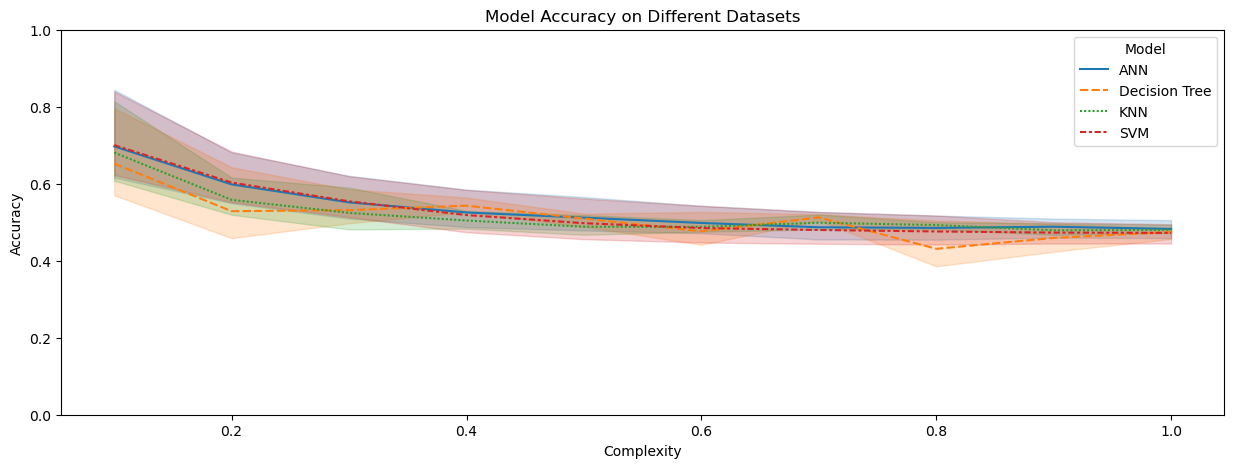

In [215]:
# Compare the accuracy based on the model and complexity
plt.figure(figsize=(15, 5))
sns.lineplot(x='Complexity', y='Accuracy', hue='Model', style='Model', data=results_df)
plt.ylim(0, 1)

plt.title('Model Accuracy on Different Datasets')
plt.show()


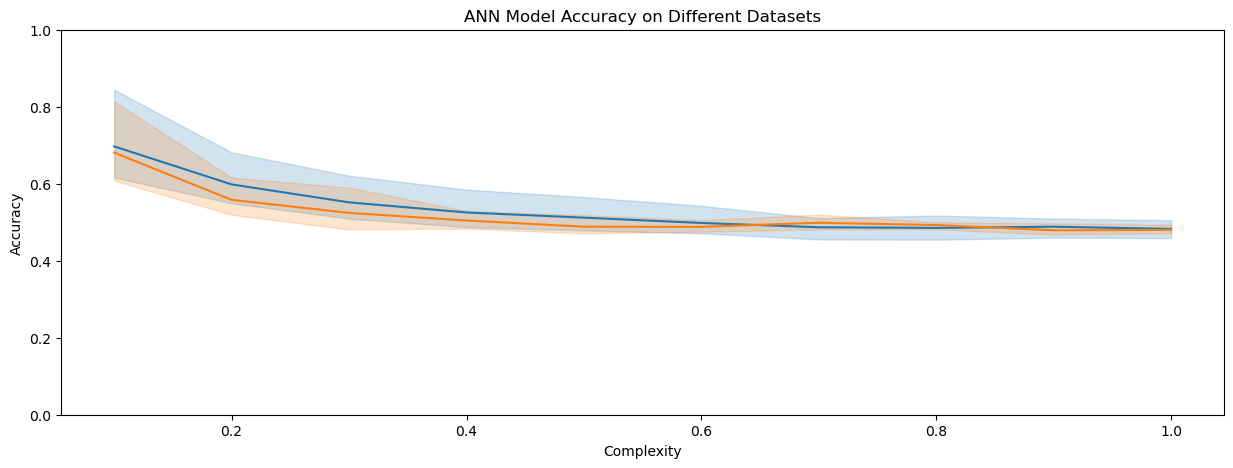

In [216]:
ann_results_df = results_df[results_df['Model'] == 'ANN']
knn_results_df = results_df[results_df['Model'] == 'KNN']
dt_results_df = results_df[results_df['Model'] == 'Decision Tree']
svc_results_df = results_df[results_df['Model'] == 'SVM']

# Compare the accuracy based on the model and complexity
plt.figure(figsize=(15, 5))
sns.lineplot(x='Complexity', y='Accuracy', data=ann_results_df)
sns.lineplot(x='Complexity', y='Accuracy', data=knn_results_df)
plt.title('ANN Model Accuracy on Different Datasets')
plt.ylim(0, 1)

plt.show()

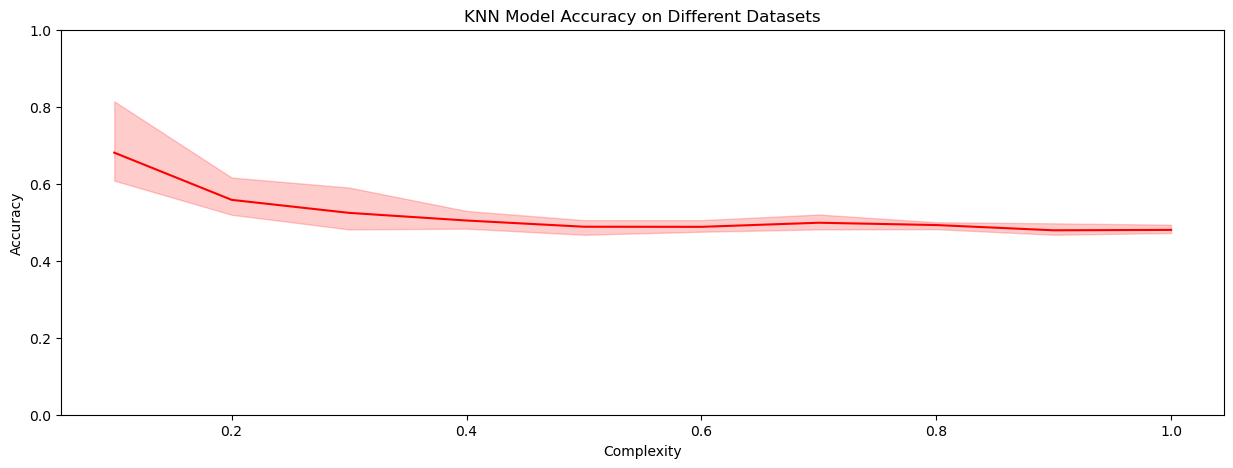

In [217]:
# Compare the accuracy based on the model and complexity
plt.figure(figsize=(15, 5))
sns.lineplot(x='Complexity', y='Accuracy', data=knn_results_df, color='red')
plt.title('KNN Model Accuracy on Different Datasets')
plt.ylim(0, 1)

plt.show()

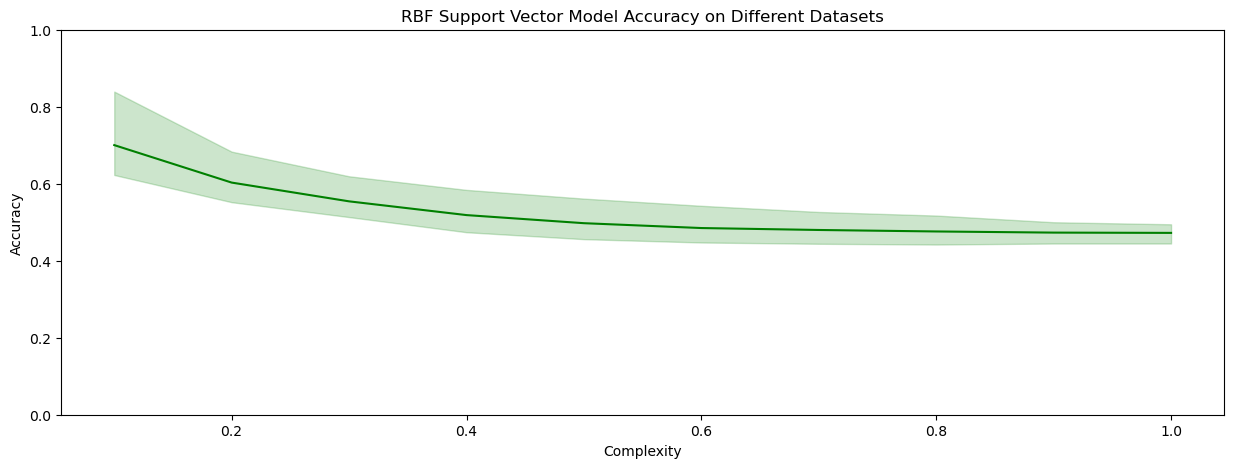

In [218]:
# Compare the accuracy based on the model and complexity
plt.figure(figsize=(15, 5))
sns.lineplot(x='Complexity', y='Accuracy', data=svc_results_df, color='green')
plt.title('RBF Support Vector Model Accuracy on Different Datasets')
plt.ylim(0, 1)

plt.show()

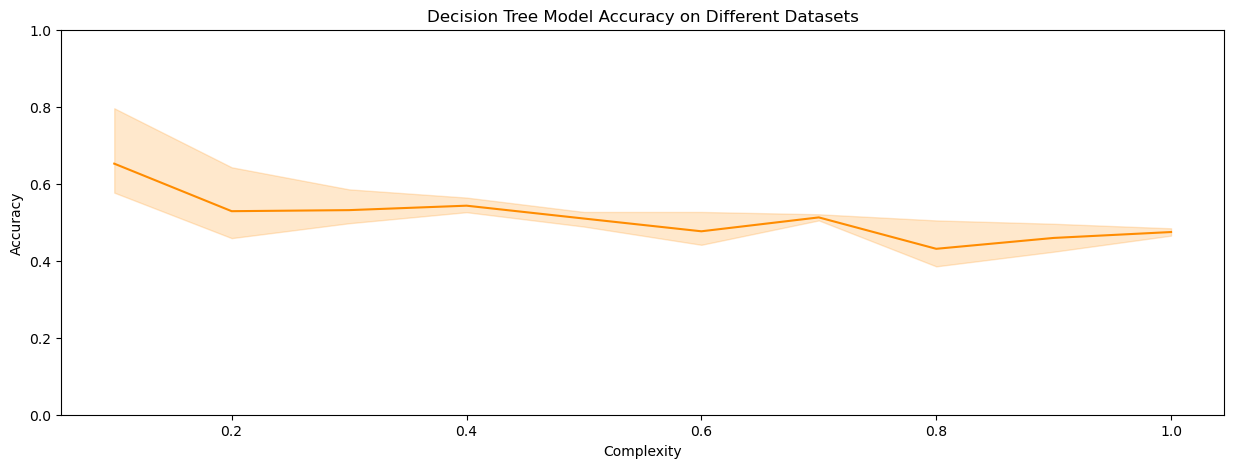

In [219]:
# Compare the accuracy based on the model and complexity
plt.figure(figsize=(15, 5))
sns.lineplot(x='Complexity', y='Accuracy', data=dt_results_df, color='darkorange')
plt.title('Decision Tree Model Accuracy on Different Datasets')
plt.ylim(0, 1)

plt.show()